# 1. Analyse et prétraitement.

In [2]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as st

%cd ..
import src.mytools as mt
%cd notebooks

sns.set(style='darkgrid')

/home/chakir/Bureau/PROJETS/Projet6
/home/chakir/Bureau/PROJETS/Projet6/notebooks


## 1.1 Exemples de prétraitements appliqués à une image.

#### 1.1.1 CHARGEMENT DE L'IMAGE ET AFFICHAGE DE SON HISTOGRAMME.

In [4]:
# Fonction pour afficher les histogrammes d'une image
def histogram_image(image):
    if image.mode == 'RGB':
        for i, color in enumerate(['r', 'g', 'b']):
            hist, bins = np.histogram(image.getchannel(i), bins=256, range=(0,256))
            plt.plot(bins[:-1], hist, color=color)
    else:
        hist, bins = np.histogram(image, bins=256, range=(0,256))
        plt.plot(bins[:-1], hist, color='k')
    plt.show()

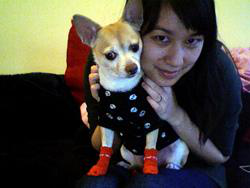

In [5]:
# Charger l'image comme matrice de pixels
img = Image.open('../data/Images/n02085620-Chihuahua/n02085620_7.jpg')
img

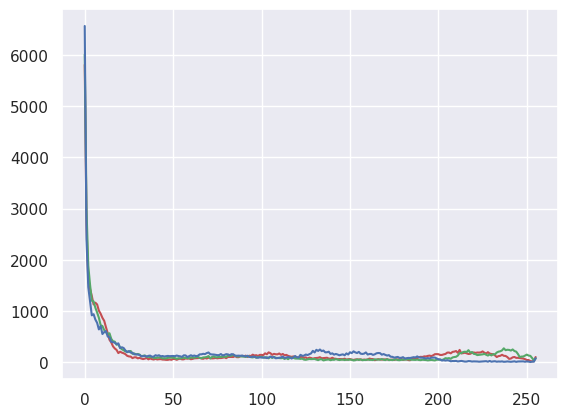

In [6]:
histogram_image(img)

#### 1.1.2 RECADRAGE.

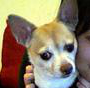

In [8]:
cropped_img = img.crop((65, 0, img.width - 95, img.height - 100))
cropped_img

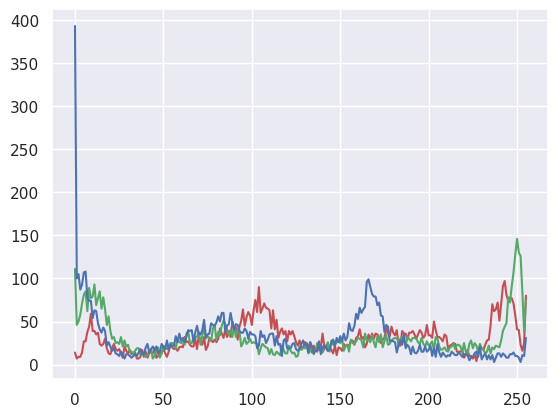

In [9]:
histogram_image(cropped_img)

In [10]:
cropped_mat = np.array(cropped_img)

#### 1.1.3 ÉTIREMENT DE L'HISTOGRAMME (WHITENING).

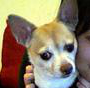

In [12]:
normalized_img = \
Image.fromarray((((cropped_mat - np.min(cropped_mat)) / (np.max(cropped_mat) - np.min(cropped_mat)))*255).astype(np.uint8))
normalized_img

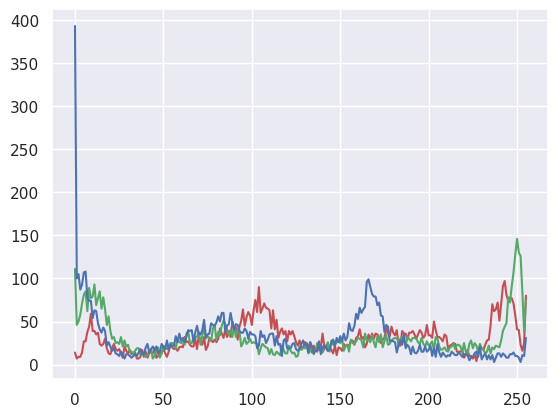

In [13]:
histogram_image(normalized_img)

#### 1.1.4 ÉGALISATION.

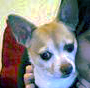

In [15]:
equalized_img = ImageOps.equalize(normalized_img)
equalized_img

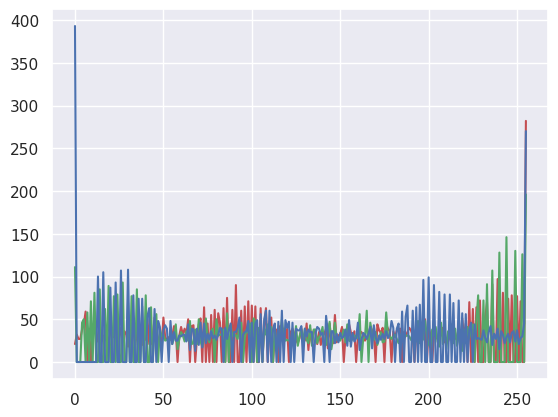

In [16]:
histogram_image(equalized_img)

#### 1.1.5 DÉBRUITAGE (AVEC FILTRE MÉDIAN)

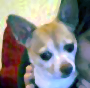

In [18]:
denoised_img = equalized_img.filter(ImageFilter.MedianFilter(size=3))
denoised_img

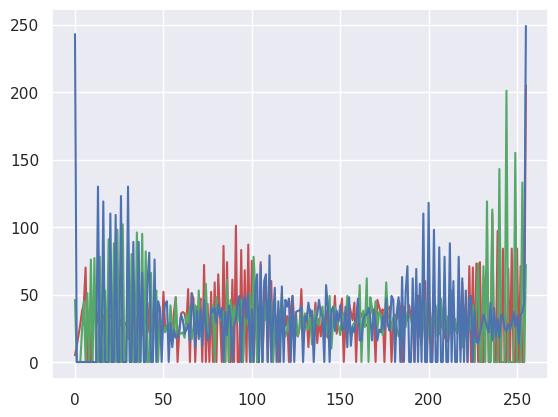

In [19]:
histogram_image(denoised_img)

#### 1.1.6 REDIMENSIONNEMENT

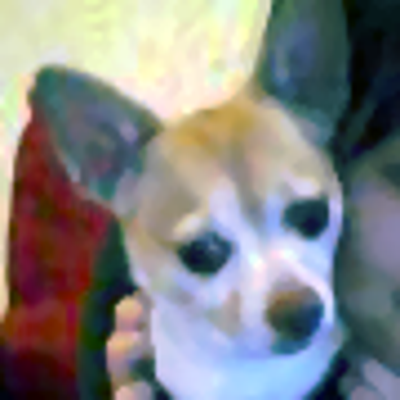

In [21]:
resized_img = denoised_img.resize((400, 400))
resized_img

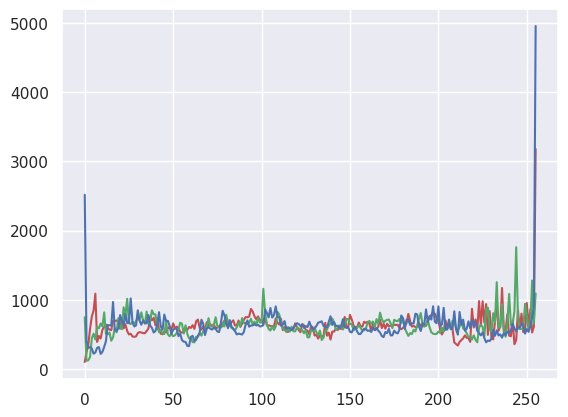

In [22]:
histogram_image(resized_img)

#### 1.1.7 MIRRORING

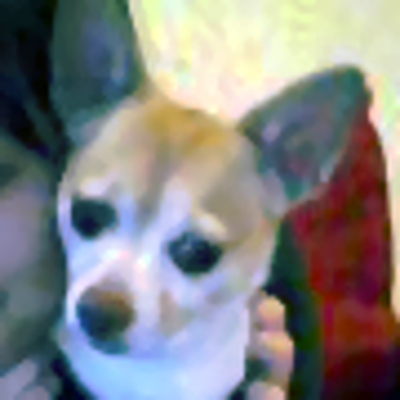

In [24]:
mirrored_img = ImageOps.mirror(resized_img)
mirrored_img

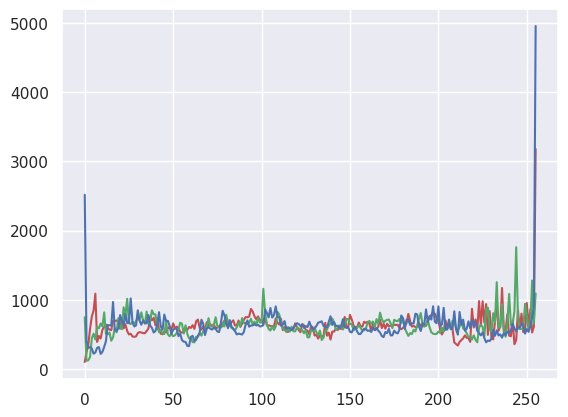

In [25]:
histogram_image(mirrored_img)

### SÉLECTION DES DONNÉES

In [27]:
# Chemin vers le dossier contenant toutes les images
base_dir = '../data/Images'
# Chemin vers les nouveaux dossiers 'train', 'validation' et 'test'
train_dir = '../data/train'
val_dir = '../data/validation'
test_dir = '../data/test'

In [46]:
# Création des dossiers 'train', 'validation' et 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Sélection aléatoire de 3 classes
all_classes = os.listdir(base_dir)
selected_classes = random.sample(all_classes, 3)
print(f'Selected classes: {selected_classes}')

Selected classes: ['n02106166-Border_collie', 'n02090622-borzoi', 'n02105162-malinois']


In [48]:
# Fonction pour copier les fichiers
def copy_files(fichiers, source, destination):
    for fichier in fichiers:
        fichier_source = os.path.join(source, fichier)
        fichier_destination = os.path.join(destination, fichier)
        shutil.copyfile(fichier_source, fichier_destination)

In [50]:
# Traitement de chaque classe sélectionnée
for class_name in selected_classes:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    
    # Diviser les images en train et test (80% train, 20% test)
    train, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Diviser les images de train en train et validation (80% train, 20% validation)
    train_images, val_images = train_test_split(train, test_size=0.2, random_state=42)
    
    # Création des sous-dossiers pour chaque classe
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    
    # Copier les images
    copy_files(train_images, class_dir, train_class_dir)
    copy_files(test_images, class_dir, test_class_dir)
    copy_files(val_images, class_dir, val_class_dir)